## My First Carto Map
A basic intro to using cartoframes


#### logging in 
Import cartoframes. This works because I have already saved my credentials via these instructions:
from cartoframes import Credentials, CartoContext
creds = Credentials(username='eschbacher', key='abcdefg')
creds.save()  # save credentials for later use (not dependent on Python session)

In [4]:
import cartoframes
from cartoframes import CartoContext
cc = CartoContext()

#### Import a shapefile
We need geopandas to read in a shapefile, so make sure they are installed via

```pip install geopandas```

After laoding the geopandas module, I read the shape file and write it to carto for use in my map.

In [3]:
import geopandas as gdp
my_shp = r"data/OEJS_NJ_Carto.shp"
data = gdp.read_file(my_shp)

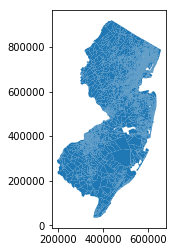

In [18]:
ax = data.plot()

#### Projection
I take a look at the projection.  I know that it is in NJ State Plane us-feet. I don't think Carto will like this, so before I import it, I will reproject it to a carto friendly WGS84, epsg = 4326.

In [31]:
print(data.crs)
data = data.to_crs(epsg = 4326)
print(data.crs)

{'init': 'epsg:3857', 'no_defs': True}
{'init': 'epsg:4326', 'no_defs': True}


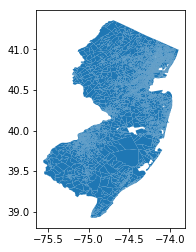

In [32]:
ax = data.plot()

#### Writing the layer to Carto
Now that we have our layer in a projection that carto likes, we can save the layer to Carto.  Because this was a shapefile there are some limitations on how it gets written.  The fields have a 10 character limit and they are all lower case. It takes a little time to save the file but once it is done a link is supplied so you can view the layer in the dashboard.

In [33]:
cc.write(data, "oejs_nj")

The following columns were changed in the CARTO copy of this dataframe:
ID -> id
ACSTOTPOP -> acstotpop
P_PM25 -> p_pm25
P_OZONE -> p_ozone
P_DSLPM -> p_dslpm
P_PTRAF -> p_ptraf
P_LDPNT -> p_ldpnt
P_PRMP -> p_prmp
P_PNPL -> p_pnpl
P_PTSDF -> p_ptsdf
P_PWDIS -> p_pwdis
P_CANCR -> p_cancr
P_RESP -> p_resp
P_MINORPCT -> p_minorpct
P_LWINCPCT -> p_lwincpct
P_LNGISPCT -> p_lngispct
P_LESHSPCT -> p_leshspct
OEJS_PctRa -> oejs_pctra
Shape_Leng -> shape_leng
Shape_Area -> shape_area
Table successfully written to CARTO: https://jolynns.carto.com/dataset/oejs_nj


#### Looking at the data
Lets just run a few commands so I can see what was uploaded and the data types used. To do this I will read in the data from carto as a dataframe.


In [34]:
df = cc.read('oejs_nj')
df.head(5)

,acstotpop,id,oejs_pctra,p_cancr,p_dslpm,p_ldpnt,p_leshspct,p_lngispct,p_lwincpct,p_minorpct,...,p_pm25,p_pnpl,p_prmp,p_ptraf,p_ptsdf,p_pwdis,p_resp,shape_area,shape_leng,the_geom
cartodb_id,,,,,,,,,,,,,,,,,,,,,
64,1677,340010105033,14.25,5,8,17,51,29,85,65,...,4,58,1,18,4,53,7,9.247414e+06,14489.218102,0106000020E6100000010000000103000000010000003E...
75,1085,340010107001,9.32,9,1,50,61,70,12,33,...,11,5,3,34,10,53,7,6.045960e+08,150800.028714,0106000020E610000001000000010300000001000000B2...
211,1562,340030033004,53.06,62,68,80,75,29,6,80,...,65,35,50,49,31,59,56,2.604524e+06,6901.014979,0106000020E61000000100000001030000000100000027...
664,942,340030371005,41.66,56,61,94,23,53,9,22,...,61,28,72,20,21,78,51,2.622947e+06,6797.462303,0106000020E6100000010000000103000000010000001F...
772,894,340030452004,90.28,93,90,87,28,97,72,82,...,92,59,93,90,57,65,87,8.538821e+05,3718.592824,0106000020E6100000010000000103000000010000000C...


In [35]:
print(df.dtypes)

acstotpop       int64
id             object
oejs_pctra    float64
p_cancr         int64
p_dslpm         int64
p_ldpnt         int64
p_leshspct      int64
p_lngispct      int64
p_lwincpct      int64
p_minorpct      int64
p_ozone         int64
p_pm25          int64
p_pnpl          int64
p_prmp          int64
p_ptraf         int64
p_ptsdf         int64
p_pwdis         int64
p_resp          int64
shape_area    float64
shape_leng    float64
the_geom       object
dtype: object


#### Simple Map
Now it is time to make my first map, this will be a simple interactive map that shows the percentile ranking calculated by the Open Environmental Justice Screening (OEJS). 

In [36]:
from cartoframes import Layer, BaseMap, styling
l = Layer('oejs_nj',
         color = {'column': 'oejs_pctra',
                  'scheme': styling.teal(5)})
cc.map(layers=l, 
       interactive=True)

# Tada!
That was easy. What I am still trying to figure out is can I write this map back to carto? 